In [1]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import pickle as pkl
import re

In [2]:
# Loading Dataset
df = pd.read_csv('laptop_data.csv')
df.head(3
       )

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

In [5]:
# Dropping the "Unnamed" column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# Replacing the "GB" in "Ram" with nothing or removing it will do same with "Weight"
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [7]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
589,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,94305.6


In [8]:
# Changing Dtype of "Ram" and "Weight"
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Company'>

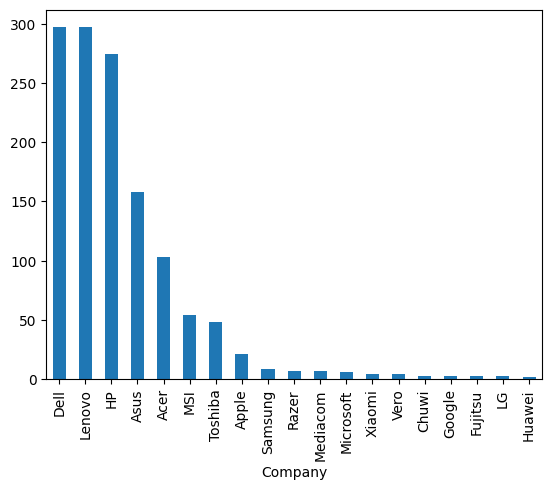

In [10]:
df['Company'].value_counts().plot(kind = 'bar')

C:\Users\user\AppData\Local\Temp\ipykernel_2852\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

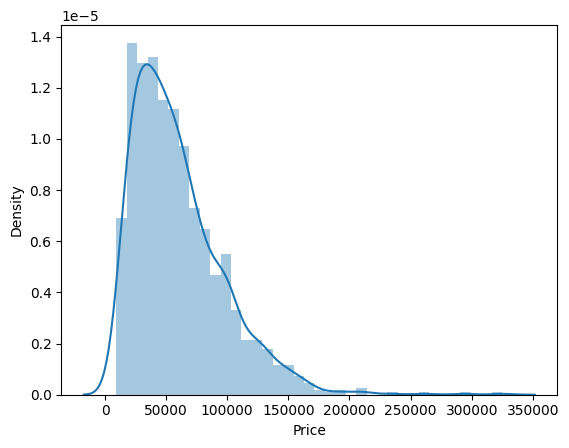

In [11]:
sns.distplot(df['Price'])

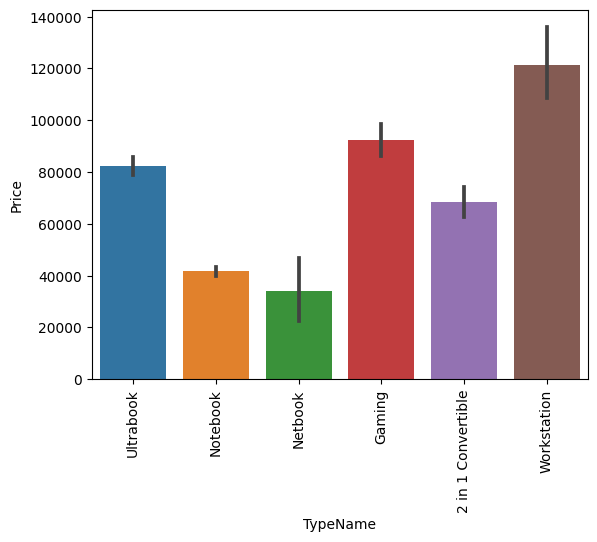

In [12]:
sns.barplot(x = 'TypeName', y =  'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

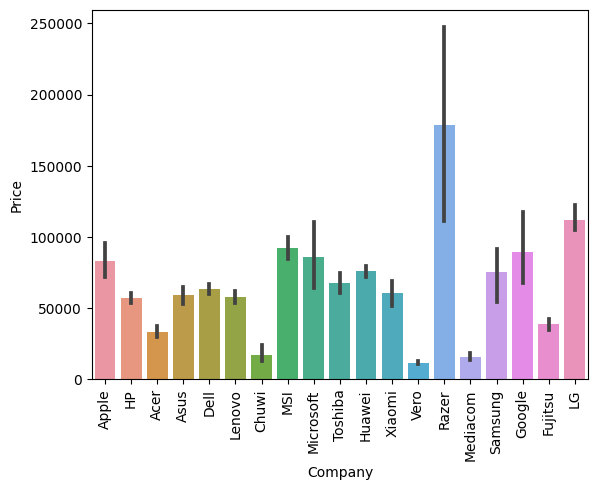

In [13]:
sns.barplot(x = 'Company', y =  'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

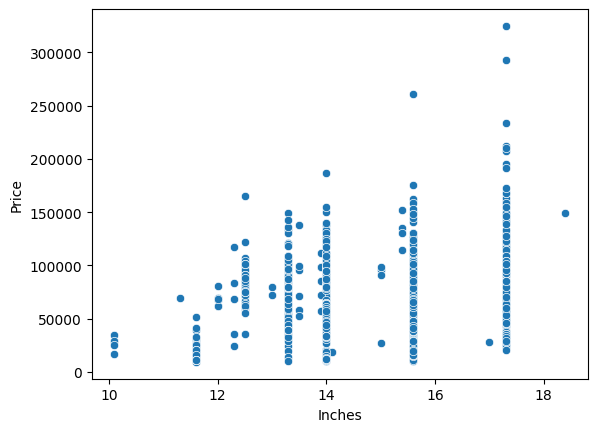

In [14]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

<Axes: xlabel='Ram', ylabel='Price'>

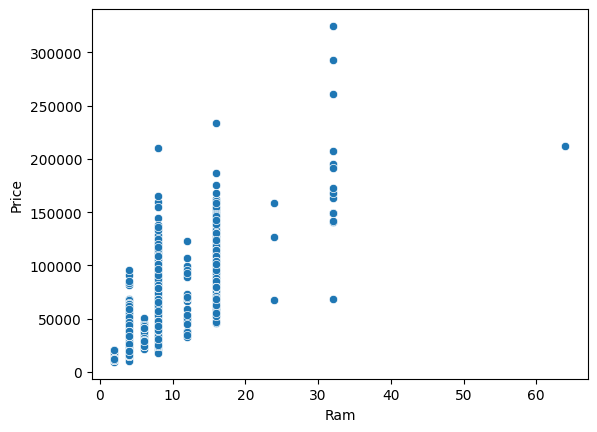

In [15]:
sns.scatterplot(x = df['Ram'], y = df['Price'])

In [16]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen'
                                                in x else 0)

In [17]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel'
                                                in x else 0)

In [18]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2,99580.32,1,0


<Axes: xlabel='Touchscreen'>

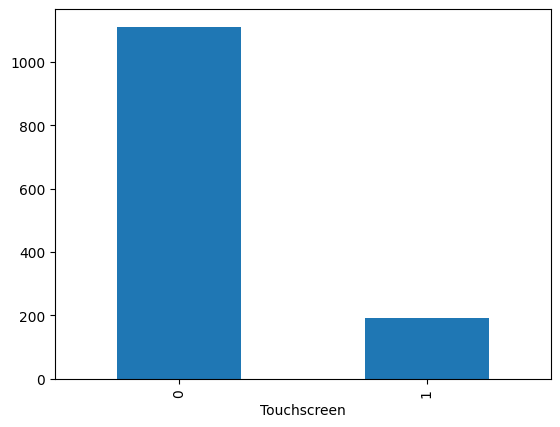

In [19]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPS'>

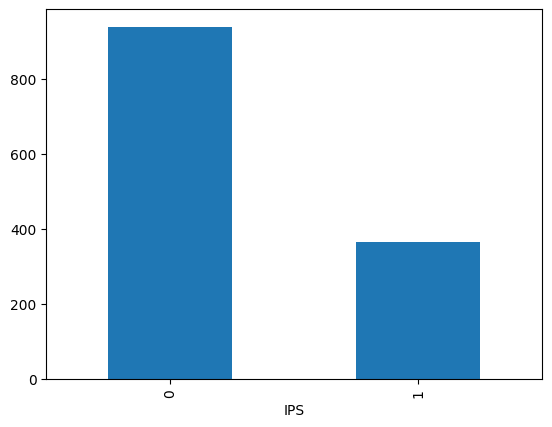

In [20]:
df['IPS'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

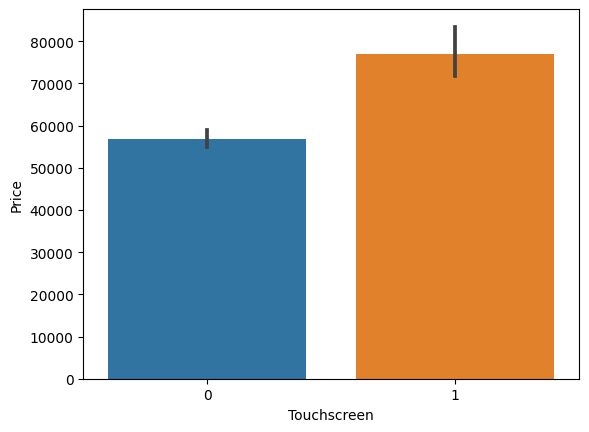

In [21]:
sns.barplot(x= df['Touchscreen'], y = df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

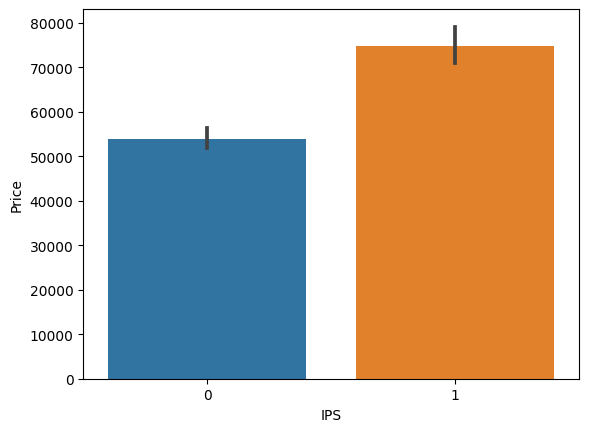

In [22]:
sns.barplot(x= df['IPS'], y = df['Price'])

In [23]:
# Creating 2 new columns for storing the Screen Resolution
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [24]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1207,Lenovo,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.2,15930.72,0,0,1366,768


In [25]:
df['X_res'] = df['X_res'].str.extract(r'(\d+)')

In [26]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.1,24029.28,0,0,1366,768


In [27]:
df.drop('ScreenResolution', axis = 1, inplace = True)

In [28]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
577,Lenovo,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.6,141884.64,0,1,1920,1080


In [29]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [30]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches'].astype('float'))

In [31]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
792,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,104961.6,1,1,1920,1080,165.632118


In [32]:
df.drop(['X_res', 'Y_res'],axis = 1, inplace = True)

In [33]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
715,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87,45664.6896,0,1,157.350512


In [34]:
# Now lets get some data form Cpu column
df['Cpu brand'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [35]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [36]:
def extraction(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Brand'
        else:
            return 'Amd Processor'

In [37]:
df['Cpu brand'] = df['Cpu brand'].apply(extraction)

<Axes: xlabel='Cpu brand'>

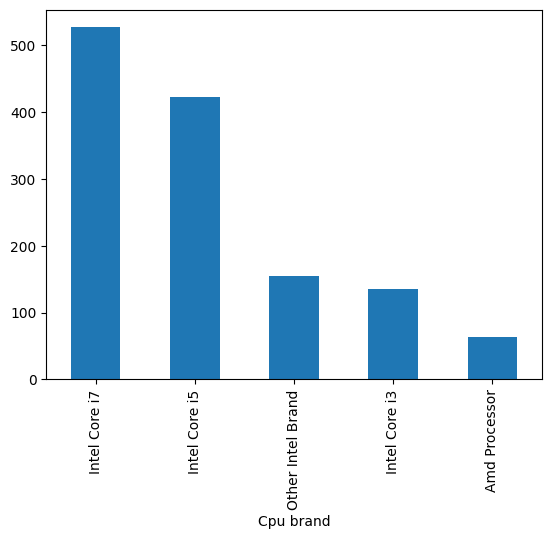

In [38]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

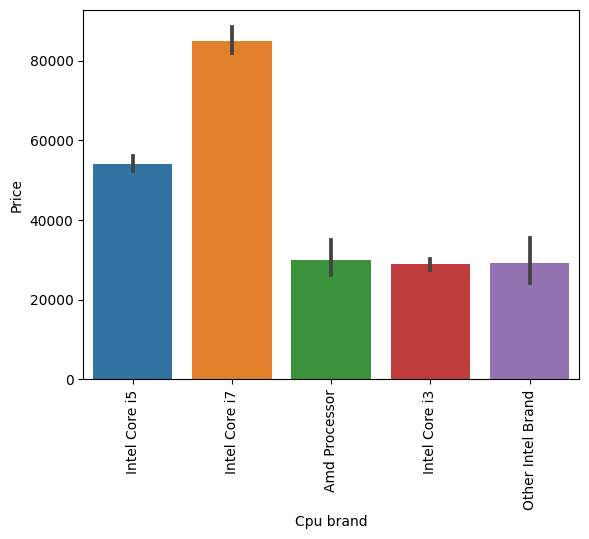

In [39]:
sns.barplot(x=df['Cpu brand'], y = df ['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df.sample(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
674,HP,2 in 1 Convertible,14.0,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,37242.72,1,1,157.350512,Intel Core i3


In [41]:
df.drop('Cpu', axis = 1, inplace = True)

In [42]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
538,HP,Gaming,17.3,12,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.62,95850.72,0,0,127.335675,Intel Core i7


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  Cpu brand    1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


In [44]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [45]:
df['GPU'] = df['Gpu'].apply(lambda x:" ".join(x.split()[0:2]))

In [46]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Iris


In [47]:
def extraction(text):
    if text == 'Intel HD' or text == 'Intel UHD':
        return text
    else:
        if text.split()[0] == 'Nvidia':
            return 'Nvidia GeForce'
        else:
            return 'Amd Radeon'

In [48]:
df['GPU'] = df['GPU'].apply(extraction)

In [49]:
df['GPU'].value_counts()

GPU
Intel HD          639
Nvidia GeForce    400
Amd Radeon        196
Intel UHD          68
Name: count, dtype: int64

In [50]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Amd Radeon


In [51]:
df.drop('Gpu', axis = 1, inplace = True)

In [52]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
610,Lenovo,Notebook,15.6,32,1TB SSD,Windows 10,2.50,261018.7200,0,1,138.461776,Other Intel Brand,Nvidia GeForce
6,Apple,Ultrabook,15.4,16,256GB Flash Storage,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,Amd Radeon
324,Acer,Notebook,15.6,8,256GB SSD,Windows 10,2.20,35111.5200,0,0,100.454670,Amd Processor,Amd Radeon


<Axes: xlabel='GPU', ylabel='Price'>

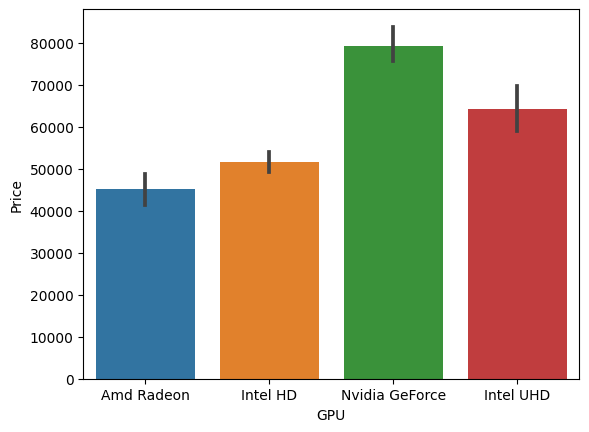

In [53]:
sns.barplot(x = 'GPU', y = 'Price', data = df)

In [54]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Amd Radeon


In [55]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

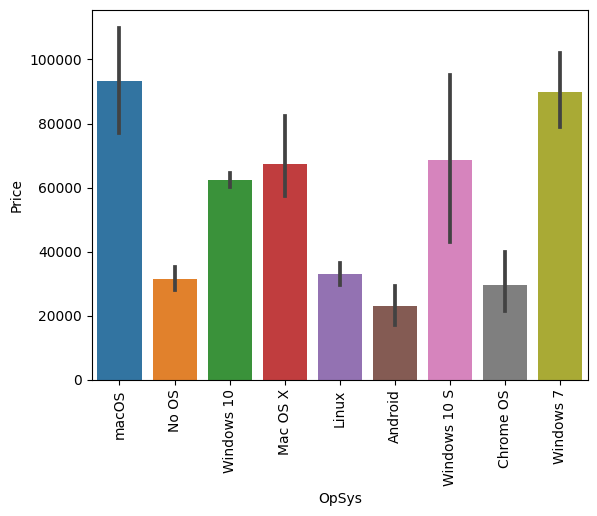

In [56]:
sns.barplot(x=df['OpSys'], y = df ['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
def Op_sys(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'macOS' or inp =='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [58]:
df.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Amd Radeon
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel HD
2,HP,Notebook,15.6,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel HD
3,Apple,Ultrabook,15.4,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Amd Radeon
4,Apple,Ultrabook,13.3,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Amd Radeon


In [59]:
df['OS'] = df['OpSys'].apply(Op_sys)

In [60]:
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: count, dtype: int64

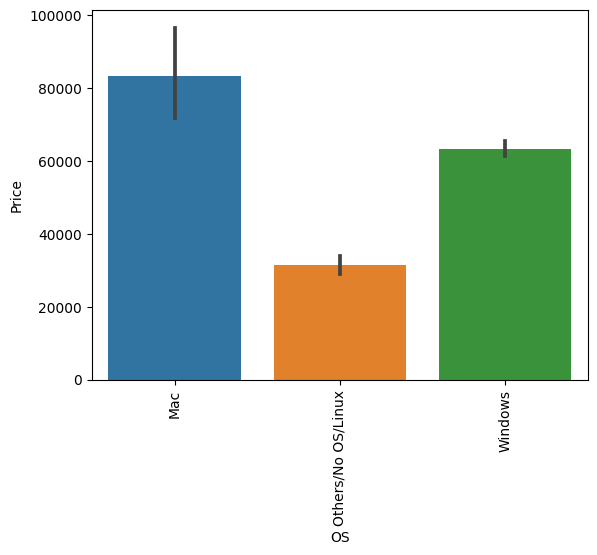

In [61]:
sns.barplot(x=df['OS'], y = df ['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
df.drop('OpSys', axis = 1, inplace = True)

In [63]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,1.30,79866.72,1,1,276.053530,Intel Core i7,Intel HD,Windows
1198,Acer,Notebook,15.6,4,1TB HDD,2.10,14492.16,0,0,100.454670,Other Intel Brand,Intel HD,Others/No OS/Linux
874,Samsung,Ultrabook,15.0,16,256GB SSD,1.23,98514.72,0,0,146.860478,Intel Core i7,Nvidia GeForce,Windows


<Axes: xlabel='Cpu brand'>

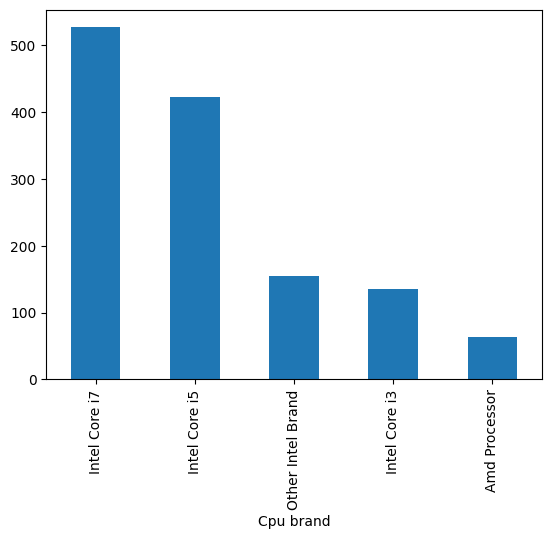

In [64]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

In [65]:
df.sample(4)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
246,HP,Notebook,15.6,8,1TB HDD,2.04,29783.5200,1,0,100.454670,Intel Core i5,Intel HD,Windows
726,Dell,Notebook,15.6,8,128GB SSD + 1TB HDD,2.20,38308.3200,0,0,141.211998,Intel Core i5,Amd Radeon,Windows
560,Acer,2 in 1 Convertible,11.6,4,32GB Flash Storage,1.25,18594.7200,1,1,189.905791,Other Intel Brand,Intel HD,Windows
687,Dell,Notebook,15.6,4,1TB HDD,2.20,29073.2976,0,0,100.454670,Intel Core i3,Amd Radeon,Windows


In [66]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [67]:
def memory_extraction(mem):
      mem = mem.lower().strip()  # Convert to lowercase and remove leading/trailing spaces

  # Check for Flash Drive first (highest priority)
      if "flash storage" in mem:
          return "Flash Storage"

  # Check for SSD
      if "ssd" in mem and "hdd" not in mem:
          return "SSD"

  # Check for HDD
      if "hdd" in mem and "ssd" not in mem:
          return "HDD"

  # Check for Dual (both SSD and HDD)
      if "ssd" in mem and "hdd" in mem:
          return "Dual"

  # No storage type found, return empty string
          return ""

In [68]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
717,Lenovo,Notebook,15.6,4,500GB HDD,2.19,15877.44,0,0,100.454670,Amd Processor,Amd Radeon,Windows
22,HP,Notebook,15.6,4,500GB HDD,1.86,13746.24,0,0,100.454670,Amd Processor,Amd Radeon,Others/No OS/Linux
1161,MSI,Gaming,14.0,16,256GB SSD + 1TB HDD,1.70,94252.32,0,0,157.350512,Intel Core i7,Nvidia GeForce,Windows


In [69]:
df['Memory']= df['Memory'].apply(memory_extraction)

In [70]:
df.head(3)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
0,Apple,Ultrabook,13.3,8,SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Amd Radeon,Mac
1,Apple,Ultrabook,13.3,8,Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel HD,Mac
2,HP,Notebook,15.6,8,SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel HD,Others/No OS/Linux


In [71]:
# df.drop(columns = ['second', 'Layer1HDD', 'Layer1SSD',
#         'Layer1Hybrid', 'Layer1Flash_Storage',
#         'Layer2HDD', 'Layer2SSD',
#         'Layer2Hybrid', 'Layer2Flash_Storage']
#        ,axis = 1, inplace = True)

In [72]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
153,MSI,Gaming,17.3,16,Dual,2.8,100699.2,0,0,127.335675,Intel Core i7,Nvidia GeForce,Windows


In [73]:
df['Memory'].value_counts()

Memory
SSD              643
HDD              375
Dual             200
Flash Storage     75
Name: count, dtype: int64

In [74]:
df.isnull().sum()

Company         0
TypeName        0
Inches          0
Ram             0
Memory         10
Weight          0
Price           0
Touchscreen     0
IPS             0
ppi             0
Cpu brand       0
GPU             0
OS              0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int32  
 4   Memory       1293 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  GPU          1303 non-null   object 
 12  OS           1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_2852\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

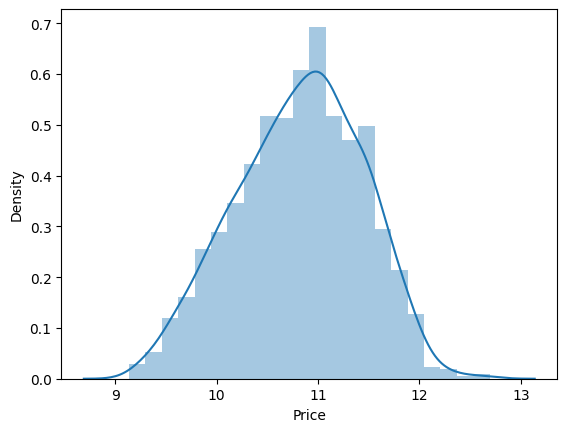

In [76]:
sns.distplot(np.log(df['Price']))

In [77]:
df['Memory'].dropna()

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1298              SSD
1299              SSD
1300    Flash Storage
1301              HDD
1302              HDD
Name: Memory, Length: 1293, dtype: object

In [78]:
df.isnull().sum()

Company         0
TypeName        0
Inches          0
Ram             0
Memory         10
Weight          0
Price           0
Touchscreen     0
IPS             0
ppi             0
Cpu brand       0
GPU             0
OS              0
dtype: int64

In [79]:
df.sample(4)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
980,Dell,2 in 1 Convertible,15.6,12,SSD,2.19,69210.72,1,1,141.211998,Intel Core i7,Intel HD,Windows
1077,MSI,Gaming,17.3,16,Dual,3.78,133146.72,0,0,127.335675,Intel Core i7,Nvidia GeForce,Windows
391,Asus,Gaming,17.3,16,Dual,3.00,84768.48,0,0,127.335675,Intel Core i7,Nvidia GeForce,Windows
469,Lenovo,Ultrabook,14.0,12,SSD,1.40,98994.24,0,1,209.800683,Intel Core i7,Intel HD,Windows


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int32  
 4   Memory       1293 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu brand    1303 non-null   object 
 11  GPU          1303 non-null   object 
 12  OS           1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


# Model Creation

In [81]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])



In [82]:
X

,Company,TypeName,Inches,Ram,Memory,Weight,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
0,Apple,Ultrabook,13.3,8,SSD,1.37,0,1,226.983005,Intel Core i5,Amd Radeon,Mac
1,Apple,Ultrabook,13.3,8,Flash Storage,1.34,0,0,127.677940,Intel Core i5,Intel HD,Mac
2,HP,Notebook,15.6,8,SSD,1.86,0,0,141.211998,Intel Core i5,Intel HD,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,SSD,1.83,0,1,220.534624,Intel Core i7,Amd Radeon,Mac
4,Apple,Ultrabook,13.3,8,SSD,1.37,0,1,226.983005,Intel Core i5,Amd Radeon,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,SSD,1.80,1,1,157.350512,Intel Core i7,Intel HD,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,SSD,1.30,1,1,276.053530,Intel Core i7,Intel HD,Windows
1300,Lenovo,Notebook,14.0,2,Flash Storage,1.50,0,0,111.935204,Other Intel Brand,Intel HD,Windows
1301,HP,Notebook,15.6,6,HDD,2.19,0,0,100.454670,Intel Core i7,Amd Radeon,Windows


In [83]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [85]:
X_train

,Company,TypeName,Inches,Ram,Memory,Weight,Touchscreen,IPS,ppi,Cpu brand,GPU,OS
91,Acer,Notebook,15.6,8,HDD,2.20,0,0,141.211998,Intel Core i7,Nvidia GeForce,Windows
940,HP,Gaming,17.3,8,Dual,2.75,0,1,127.335675,Intel Core i5,Nvidia GeForce,Windows
1026,HP,Notebook,14.0,4,HDD,2.31,0,0,111.935204,Intel Core i5,Intel HD,Windows
1257,Dell,Notebook,15.6,4,HDD,2.29,0,0,100.454670,Intel Core i3,Intel HD,Windows
487,Dell,Notebook,15.6,16,SSD,2.06,0,0,141.211998,Intel Core i7,Nvidia GeForce,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,HDD,2.20,0,0,100.454670,Intel Core i3,Nvidia GeForce,Windows
299,Asus,Ultrabook,15.6,16,SSD,1.63,0,0,141.211998,Intel Core i7,Nvidia GeForce,Windows
493,Acer,Notebook,15.6,8,HDD,2.20,0,0,100.454670,Amd Processor,Amd Radeon,Windows
527,Lenovo,Notebook,15.6,8,HDD,2.20,0,0,100.454670,Intel Core i3,Nvidia GeForce,Others/No OS/Linux


In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown = 'ignore',drop='first'),[0,1,4,9,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',MAE(y_test,y_pred))

In [102]:
pipe.predict([['Dell', 'Notebook', 15.6, 4, 'Hdd', 2.29, 0, 0, 100.454670, 'Intel Core i3', 'Intel HD', 'Windows']])

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([10.41294777])

In [106]:
y.head(1258)

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1253    10.952842
1254    10.071363
1255     9.801561
1256    11.525170
1257    10.169966
Name: Price, Length: 1258, dtype: float64

In [109]:
pipe.predict([['Asus', 'Notebook', 15.6, 8, 
               'Hdd', 2.37, 0, 0, 
               141.211998, 'Intel Core i5', 
               'Intel HD', 'Windows']])

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([10.9062787])

In [110]:
y.head(463)

0      11.175755
1      10.776777
2      10.329931
3      11.814476
4      11.473101
         ...    
458    11.470547
459    10.436873
460    10.274510
461    10.050907
462    10.594300
Name: Price, Length: 463, dtype: float64